## Assignment 1: Deep Learning Fundamentals -- Perceptron


This assignment is aimed at predicting diabiets using Pima Indian Diabiets dataset.

In [1]:
# Importing libraries. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Avoid non-essential warnings 
# import warnings
# warnings.filterwarnings('ignore')


### 1 Data Exploration and Analysis

Load the original data to explore the distribution of each feature and label.

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There is no Nan value of the dataset and all features are numerical.

In [5]:
# Extract the feature names and label names
features = data.columns[:-1] 
labels  = data.columns[-1]

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


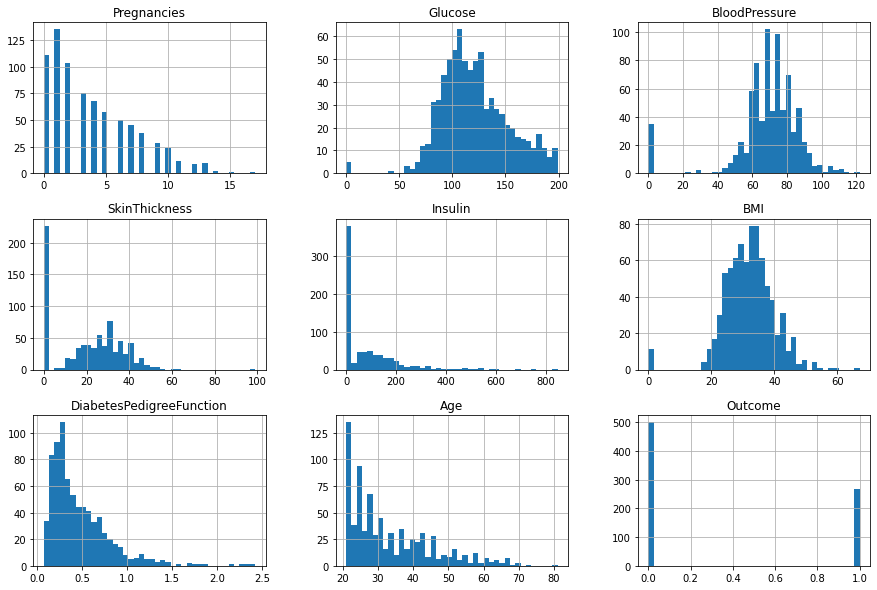

In [7]:
data_hist = data.hist(bins=40, figsize=(15, 10))

In [8]:
def bar_plot(axes, feature, index, labels):
    sns.boxplot(x=labels, y=data[feature], ax=axes[index // 2, index % 2])
    axes[index // 2, index % 2].set_xlabel('Label')
    axes[index // 2, index % 2].set_ylabel(feature)
    

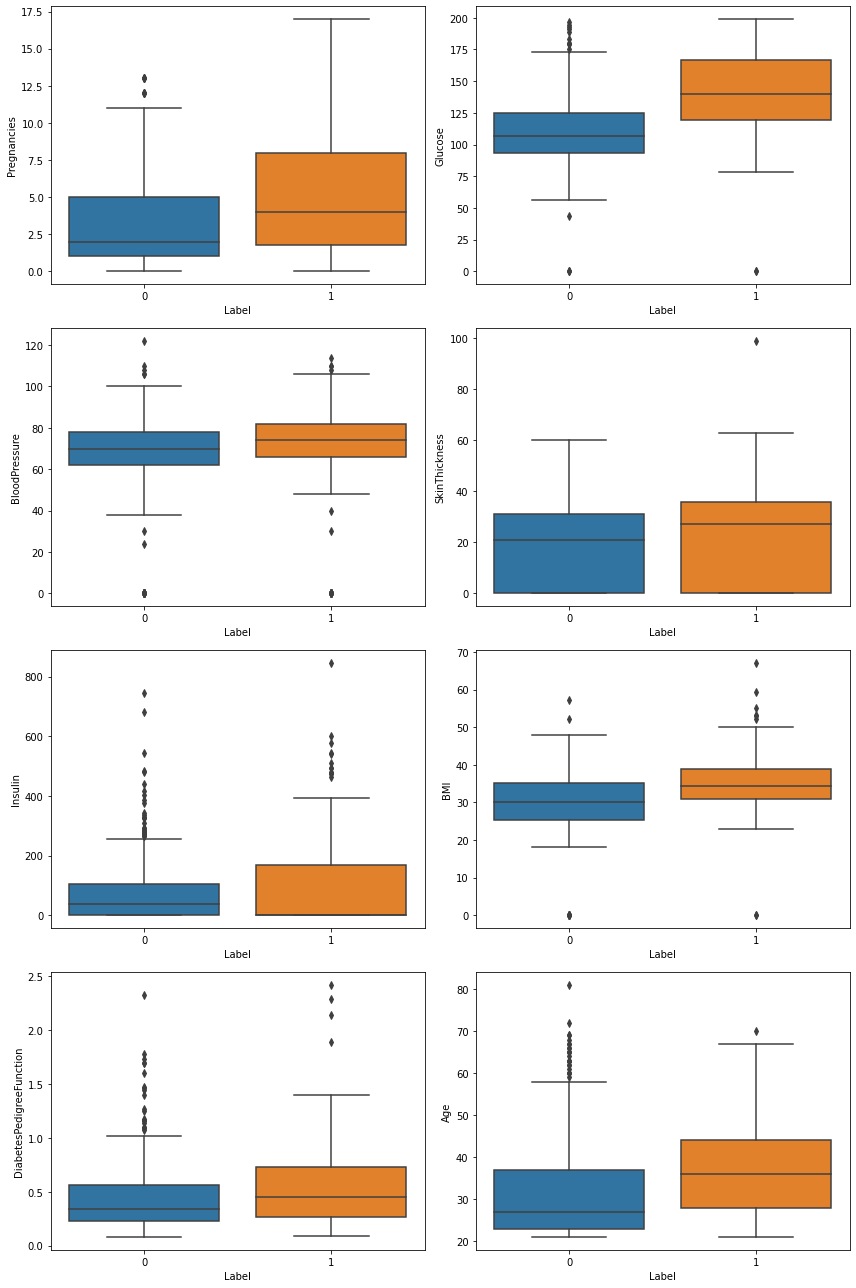

In [9]:
labels_ = data['Outcome']  

fig, axes = plt.subplots(4, 2, figsize=(12, 18))

for idx, feature in enumerate(features):
    bar_plot(axes, feature, idx, labels_ )

plt.tight_layout()
plt.show()


It is obvious that most features of this dataset are left or right skewed with some ouliers. The dataset need to be cleaned. 

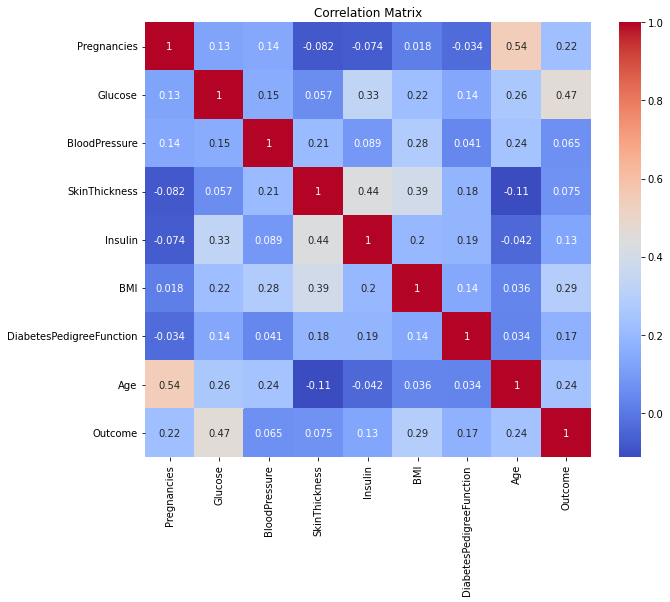

In [10]:
correlation_matrix = data.corr()  
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix')  
plt.show()

It is shown in the correlation matrix that skinthickness and bloodpressure has the lowest correlation with the outcome. In the expirement following, we could consider to drop out these two features as they might not infect the result.

Use cleaned and scaled data for further processing.  
  
Normally, data scaling should be applied after splitting the data to avoid data leaking. In this case, as the dataset has been scaled into -1 and 1 using StandardScaler. And we need to assume the valid and test data are all the same distribution of train dataset. And the scaled data is recommended. So this data leakage can be ignored in this case.  
  
Convert -1 in y to 0 so that the labels match the expected output of the sigmoid function (0 or 1)


In [11]:
X, y = load_svmlight_file('diabetes_scale.txt')
y = np.where(y == -1, 0, y)

### 2. Dataset Splitting

In [12]:
# Split the data set into train, valid and test with proportion of 70%, 15%, 15%.
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42)


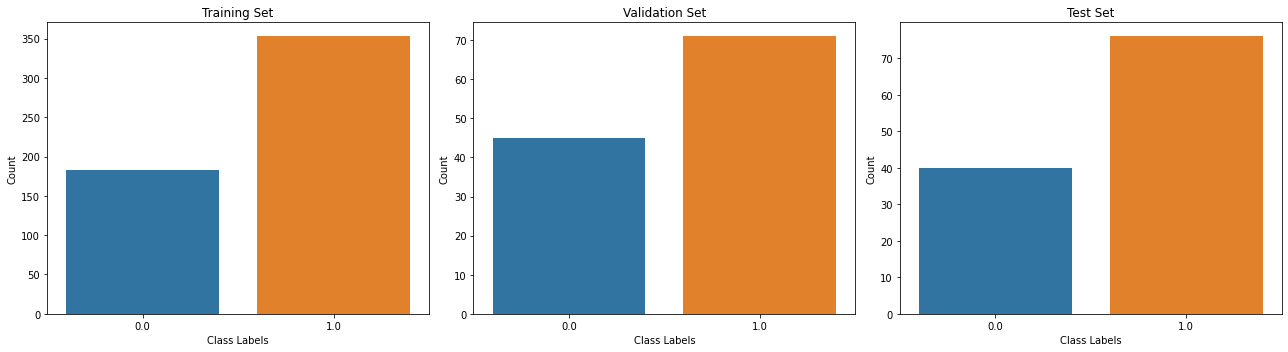

In [13]:
# Check the distribution of labels are same in train, valid and test dataset.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], x=y_train)
axes[0].set_title("Training Set")
axes[0].set_xlabel("Class Labels")
axes[0].set_ylabel("Count")

sns.countplot(ax=axes[1], x=y_valid)
axes[1].set_title("Validation Set")
axes[1].set_xlabel("Class Labels")
axes[1].set_ylabel("Count")

sns.countplot(ax=axes[2], x=y_test)
axes[2].set_title("Test Set")
axes[2].set_xlabel("Class Labels")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [14]:
# Convert dataset into tensor for pytorch
X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid.toarray(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"X_valid_tensor shape: {X_valid_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")

X_train_tensor shape: torch.Size([536, 8])
X_valid_tensor shape: torch.Size([116, 8])
X_test_tensor shape: torch.Size([116, 8])


### 3 Baseline -- Random Guess

In [15]:
# Random guess
np.random.seed(8)
y_val_pred_random = np.random.choice([0, 1], size=len(y_valid), p=[0.5, 0.5])

accuracy_baseline = accuracy_score(y_valid, y_val_pred_random)
conf_matrix = confusion_matrix(y_valid, y_val_pred_random)
class_report = classification_report(y_valid, y_val_pred_random)

In [16]:
print(f"Baseline Accuracy : {accuracy_baseline * 100:.2f}%")

Baseline Accuracy : 51.72%


In [17]:
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[21 24]
 [32 39]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      0.47      0.43        45
         1.0       0.62      0.55      0.58        71

    accuracy                           0.52       116
   macro avg       0.51      0.51      0.51       116
weighted avg       0.53      0.52      0.52       116



### 3 Optimizition

In [18]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)# Define a linear layer which has the same dimension with input

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

input_dim = X_train_tensor.shape[1]
model = Perceptron(input_dim)

criterion = nn.BCELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
# Create dataset and dataloader
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [20]:
# Update train function not output epochs
def model_train(model, num_epochs, criterion, optimizer, dataloader):
    loss_curve = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for X_batch, y_batch in dataloader:
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            
            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
        avg_loss = epoch_loss / len(dataloader)
        loss_curve.append(avg_loss)     
            
    return model, loss_curve

In [21]:
# Define a function to test the model
def test_model(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        outputs = model(X_test_tensor).squeeze()
        predicted = (outputs > 0.5).float()  # Convert probabilities to class labels (0 or 1)
        accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
        return accuracy, predicted

In [22]:
def plot_loss(loss_curve, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_curve, label="Loss Curve")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(model_name)
    plt.legend()
    plt.show()

In [23]:
# Find the best combination of following settings
optimizers = ['SGD', 'Adam', 'RMSprop']
learning_rates = [0.1, 0.01, 0.001]
epochs = [150, 300, 600]

# Define a function to get the optimizer and parameters.
def get_optimizer(optimizer_name, model, learning_rate):
    if optimizer_name == 'SGD':
        return optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'Adam':
        return optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'RMSprop':
        return optim.RMSprop(model.parameters(), lr=learning_rate)
    else:
        raise ValueError(f"Optimizer {optimizer_name} not recognized")


In [24]:
# Initialize best model
best_accuracy = 0
best_params = None
best_model = None
results = dict()
loss_curves = dict()
n = 0

for optimizer_name in optimizers:
    for lr in learning_rates:
        for num_epochs in epochs:
            
            n += 1
            num_model = "Model " + str(n)
            
            input_dim = X_train_tensor.shape[1]
            model = Perceptron(input_dim)
            optimizer = get_optimizer(optimizer_name, model, lr)

            mod, curve = model_train(model, num_epochs, criterion, optimizer, dataloader)
            accuracy,_ = test_model(model, X_valid_tensor, y_valid_tensor)
            
            loss_curves[num_model] = curve
            results[num_model] = {'Optimizer':optimizer_name, 'LearningRate':lr, 'EpochNumber':num_epochs,'Regularization':0, 'Accuracy':accuracy}

            print(f"[{num_model}] Optimizer: {optimizer_name}, Learning Rate: {lr}, Epochs: {num_epochs}, Penalty: No penalty, Accuracy: {accuracy:.4f}")

            # Update the best model
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'optimizer': optimizer_name, 'learning_rate': lr, 'num_epochs': num_epochs}
                best_model = model
                best_name = num_model

[Model 1] Optimizer: SGD, Learning Rate: 0.1, Epochs: 150, Penalty: No penalty, Accuracy: 0.6983
[Model 2] Optimizer: SGD, Learning Rate: 0.1, Epochs: 300, Penalty: No penalty, Accuracy: 0.7069
[Model 3] Optimizer: SGD, Learning Rate: 0.1, Epochs: 600, Penalty: No penalty, Accuracy: 0.7155
[Model 4] Optimizer: SGD, Learning Rate: 0.01, Epochs: 150, Penalty: No penalty, Accuracy: 0.6983
[Model 5] Optimizer: SGD, Learning Rate: 0.01, Epochs: 300, Penalty: No penalty, Accuracy: 0.7328
[Model 6] Optimizer: SGD, Learning Rate: 0.01, Epochs: 600, Penalty: No penalty, Accuracy: 0.7069
[Model 7] Optimizer: SGD, Learning Rate: 0.001, Epochs: 150, Penalty: No penalty, Accuracy: 0.6121
[Model 8] Optimizer: SGD, Learning Rate: 0.001, Epochs: 300, Penalty: No penalty, Accuracy: 0.6121
[Model 9] Optimizer: SGD, Learning Rate: 0.001, Epochs: 600, Penalty: No penalty, Accuracy: 0.6466
[Model 10] Optimizer: Adam, Learning Rate: 0.1, Epochs: 150, Penalty: No penalty, Accuracy: 0.6983
[Model 11] Optimize

In [25]:
def plot_curve(ax, curve, model_name):
    ax.plot(curve)
    ax.set_title(model_name)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.grid(True)

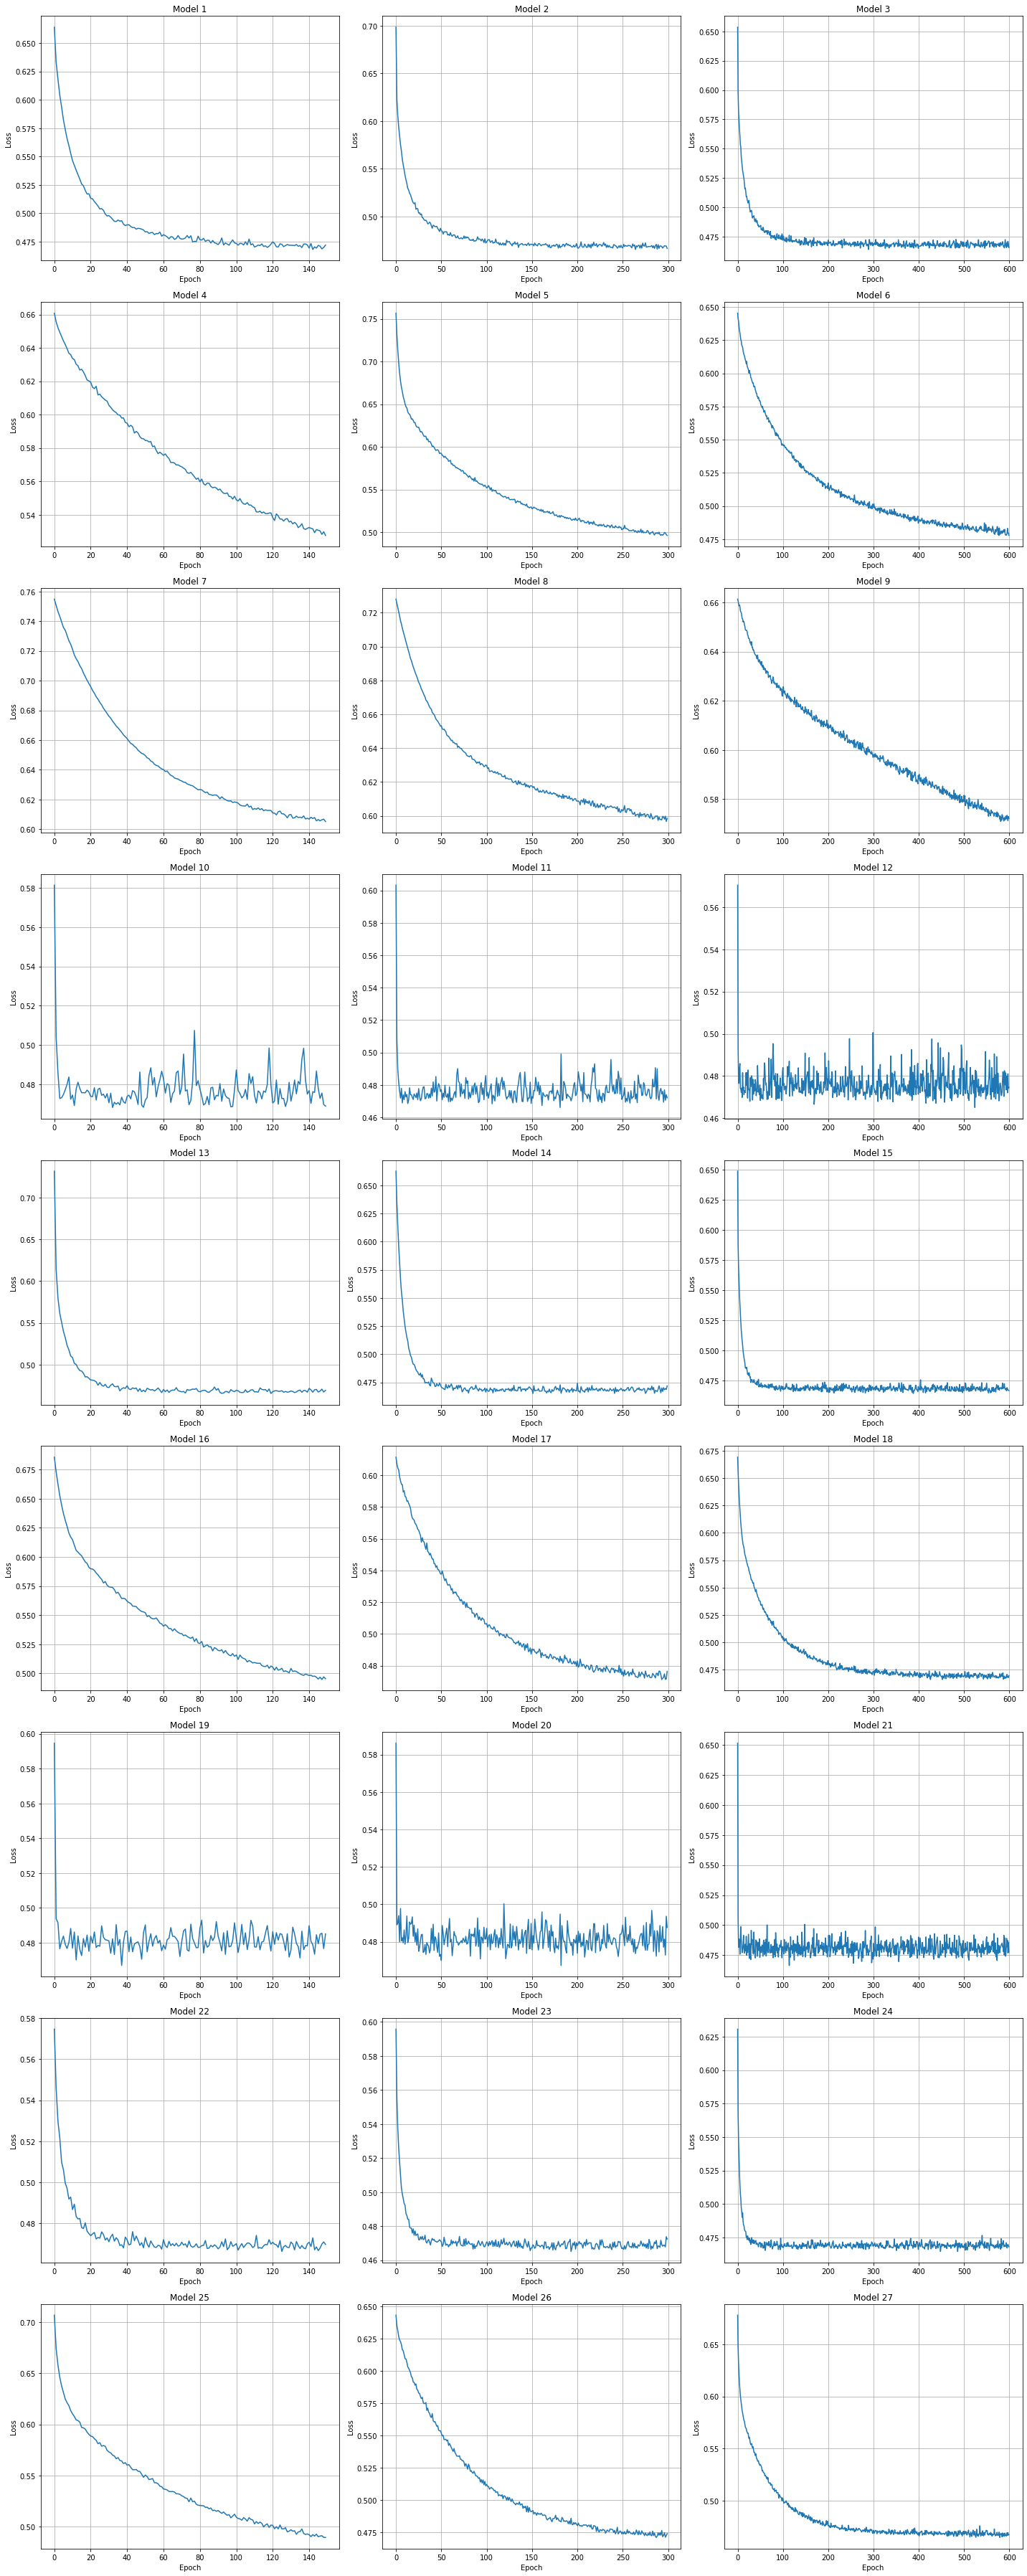

In [26]:
num_rows = 9
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 50))

for i, model_name in enumerate(loss_curves.keys()):
    row = i // num_cols  
    col = i % num_cols   
    curve = loss_curves[model_name] 
    plot_curve(axes[row, col], curve, model_name)  

plt.tight_layout() 
plt.show()

In [27]:
print(f"Best Model: {best_name}, Best Params: {best_params}, Best Accuracy: {best_accuracy:.4f}")

Best Model: Model 16, Best Params: {'optimizer': 'Adam', 'learning_rate': 0.001, 'num_epochs': 150}, Best Accuracy: 0.7500


Add penalty-Optimization

In [28]:
epoch = best_params['num_epochs']
lr = best_params['learning_rate']
opt_name = best_params['optimizer']

for decay in [0.1, 0.01, 0.001]:
    n += 1
    num_model = "Model " + str(n)    
    input_dim = X_train_tensor.shape[1]
    model = Perceptron(input_dim)
    
    if opt_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=decay)
    elif opt_name == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
    elif opt_name == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=lr, weight_decay=decay)
    else:
        raise ValueError(f"Optimizer {opt_name} not recognized")

    model_p, curve_p = model_train(model, epoch, criterion, optimizer, dataloader)
    accuracy_p,_ = test_model(model_p, X_valid_tensor, y_valid_tensor)
    
    results[num_model] = {'Optimizer':opt_name, 'LearningRate':lr, 'EpochNumber':epoch,'Regularization':decay, 'Accuracy':accuracy}
    loss_curves[num_model] = curve_p

    
    print(f"[{num_model}] Optimizer: {opt_name}, Learning Rate: {lr}, Epochs: {epoch}, Penalty: R2 {decay}, Accuracy: {accuracy_p:.4f}")
    
#     if accuracy_p > best_accuracy:
#         best_accuracy = accuracy_p
#         best_params = {'optimizer': opt_name, 'learning_rate': lr, 'num_epochs':epoch, 'L2 regularisation':decay}
#         best_model = model_p
#         best_name = num_model


[Model 28] Optimizer: Adam, Learning Rate: 0.001, Epochs: 150, Penalty: R2 0.1, Accuracy: 0.6466
[Model 29] Optimizer: Adam, Learning Rate: 0.001, Epochs: 150, Penalty: R2 0.01, Accuracy: 0.7586
[Model 30] Optimizer: Adam, Learning Rate: 0.001, Epochs: 150, Penalty: R2 0.001, Accuracy: 0.7414


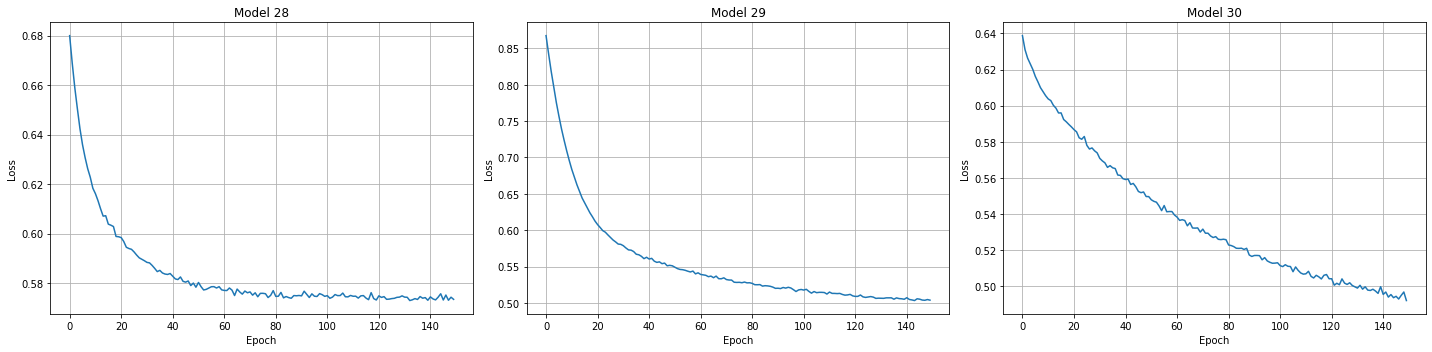

In [29]:
num_rows = 1
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))

for i, model_name in enumerate(loss_curves.keys()):
    if model_name in ['Model 28', 'Model 29', 'Model 30']:
        row = (i-27) // num_cols  
        col = (i-27) % num_cols   
        curve = loss_curves[model_name]
        plot_curve(axes[col], curve, model_name)  

plt.tight_layout() 
plt.show()

### 3.3 Feature Selection

In [30]:
def remove_columns(sparse_matrix, columns):
    mask = np.ones(sparse_matrix.shape[1], dtype=bool) 
    mask[columns] = False 
    return sparse_matrix[:, mask]

In [31]:
columns_to_remove = [2, 3]
X_train_filtered = remove_columns(X_train, columns_to_remove)
X_valid_filtered = remove_columns(X_valid, columns_to_remove)
X_test_filtered = remove_columns(X_test, columns_to_remove)

In [32]:
X_train_filtered_dense = X_train_filtered.toarray() 
X_valid_filtered_dense = X_valid_filtered.toarray()
X_test_filtered_dense = X_test_filtered.toarray()

X_train_tensor_filtered = torch.tensor(X_train_filtered_dense, dtype=torch.float32)
y_train_tensor_filtered = torch.tensor(y_train, dtype=torch.float32) 

dataset_filtered = TensorDataset(X_train_tensor_filtered, y_train_tensor_filtered)
dataloader_filtered = DataLoader(dataset_filtered, batch_size=32, shuffle=True)

In [33]:
n += 1
num_model = "Model " + str(n)    

input_dim_filtered = X_train_tensor_filtered.shape[1]  
model = Perceptron(input_dim_filtered)  

epoch = best_params['num_epochs']
lr = best_params['learning_rate']
opt_name = best_params['optimizer']
optimizer = get_optimizer(opt_name, model, lr)

model_filtered, loss_filtered = model_train(model, epoch, criterion, optimizer, dataloader_filtered)
loss_curves[num_model] = loss_filtered

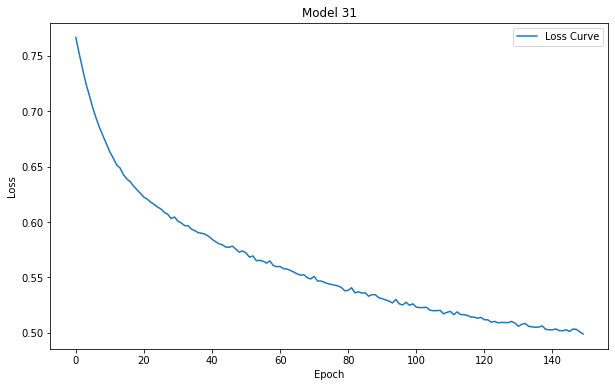

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(loss_filtered, label="Loss Curve")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(num_model)
plt.legend()
plt.show()

In [35]:
X_valid_tensor_filtered = torch.tensor(X_valid_filtered_dense, dtype=torch.float32)
y_valid_tensor_filtered = torch.tensor(y_valid, dtype=torch.float32) 

In [36]:
accuracy_p,_ = test_model(model_filtered, X_valid_tensor_filtered, y_valid_tensor_filtered)
results[num_model] = {'Optimizer':opt_name, 'LearningRate':lr, 'EpochNumber':epoch,'Regularization':0, 'Accuracy':accuracy_p}

print(f"[{num_model}] Optimizer: {opt_name}, Learning Rate: {lr}, Epochs: {epoch}, Penalty: No penalty, Accuracy: {accuracy_p:.4f}")

[Model 31] Optimizer: Adam, Learning Rate: 0.001, Epochs: 150, Penalty: No penalty, Accuracy: 0.7328


## 4 Discussion

In [57]:
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results.to_csv('output.csv', index=True)

In [38]:
df_results.head()


,Optimizer,LearningRate,EpochNumber,Regularization,Accuracy
Model 1,SGD,0.10,150,0.0,0.698276
Model 2,SGD,0.10,300,0.0,0.706897
Model 3,SGD,0.10,600,0.0,0.715517
Model 4,SGD,0.01,150,0.0,0.698276
Model 5,SGD,0.01,300,0.0,0.732759


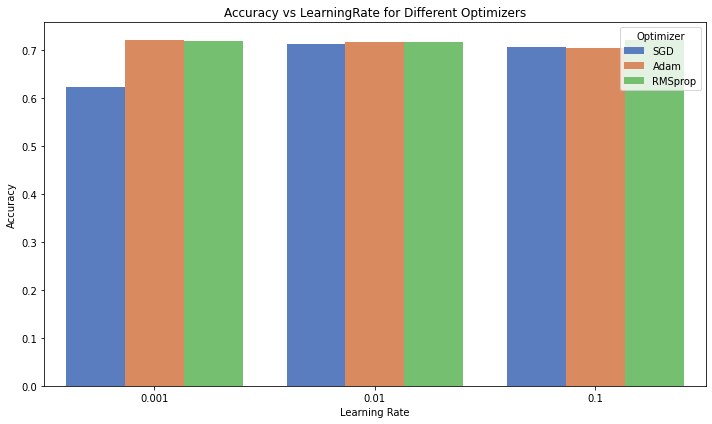

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='LearningRate', y='Accuracy', hue='Optimizer', ci=None, palette='muted')

plt.title('Accuracy vs LearningRate for Different Optimizers')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


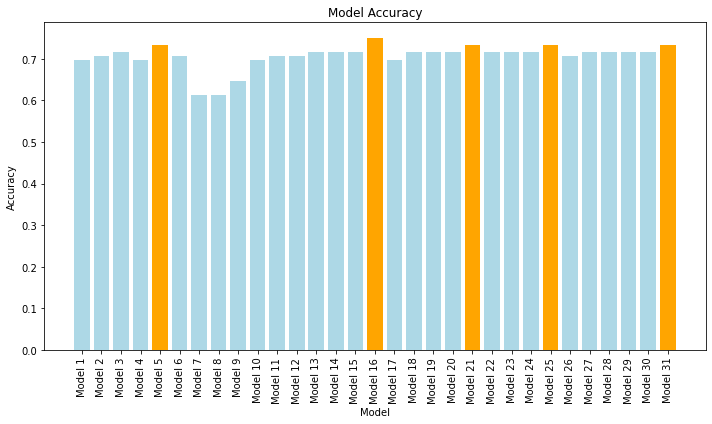

In [40]:
# Accuracies for each model

colors = ['orange' if acc > 0.72 else 'lightblue' for acc in df_results['Accuracy']]

plt.figure(figsize=(10, 6))
plt.bar(df_results.index, df_results['Accuracy'], color=colors)
plt.xticks(rotation=90)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()

plt.show()

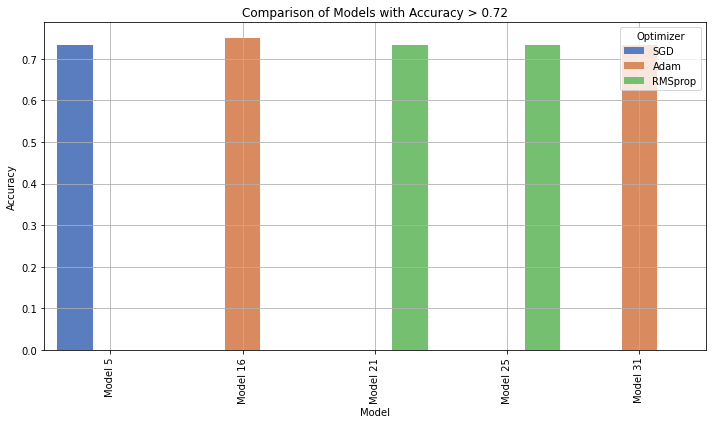

In [41]:
df_filtered = df_results[df_results['Accuracy'] > 0.72]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x=df_filtered.index, y='Accuracy', hue='Optimizer', palette='muted')

plt.title('Comparison of Models with Accuracy > 0.72')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

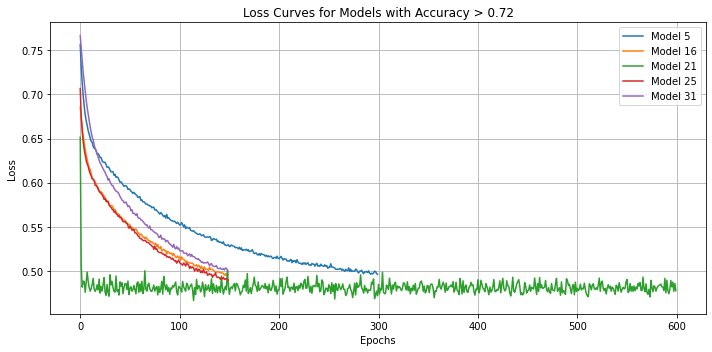

In [42]:
model_names_above_07 = df_results[df_results['Accuracy'] > 0.72].index.tolist()

plt.figure(figsize=(10, 5)) 

for model_name in model_names_above_07:
        plt.plot(loss_curves[model_name], label=model_name)
        
plt.title('Loss Curves for Models with Accuracy > 0.72')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [43]:
def lr_curves(loss_curve, model1,model2,model3, model_name):
    model1_curve = loss_curves[model1]
    model2_curve = loss_curves[model2]
    model3_curve = loss_curves[model3]

    plt.plot(model1_curve, label='learning rate = 0.01')
    plt.plot(model2_curve, label='learning rate = 0.001')
    plt.plot(model3_curve, label='learning rate = 0.0001')

    plt.title(f'Loss Curves for {model_name} Model with different learning rates')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()

    plt.show()

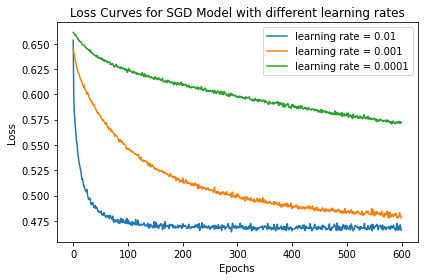

In [44]:
lr_curves(loss_curves, 'Model 3', 'Model 6', 'Model 9', "SGD")

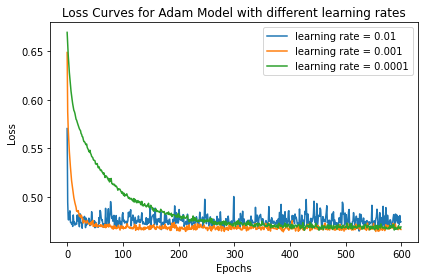

In [45]:
lr_curves(loss_curves, 'Model 12', 'Model 15', 'Model 18', "Adam")

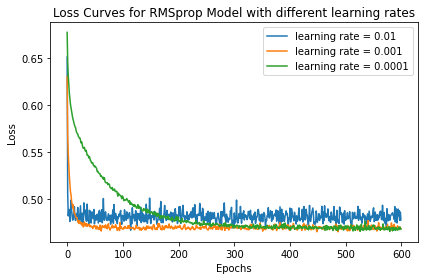

In [46]:
lr_curves(loss_curves, 'Model 21', 'Model 24', 'Model 27', "RMSprop")

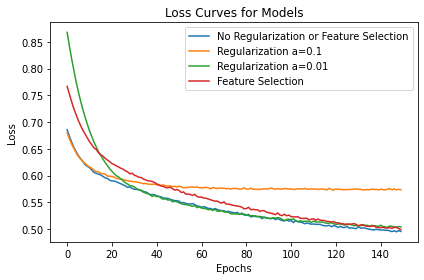

In [47]:
modelb_curve = loss_curves[best_name]
model28_curve = loss_curves['Model 28']
model29_curve = loss_curves['Model 29']
model31_curve = loss_curves['Model 31']


plt.plot(modelb_curve, label='No Regularization or Feature Selection')
plt.plot(model28_curve, label='Regularization a=0.1')
plt.plot(model29_curve, label='Regularization a=0.01')
plt.plot(model31_curve, label='Feature Selection')


plt.title(f'Loss Curves for Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

plt.show()

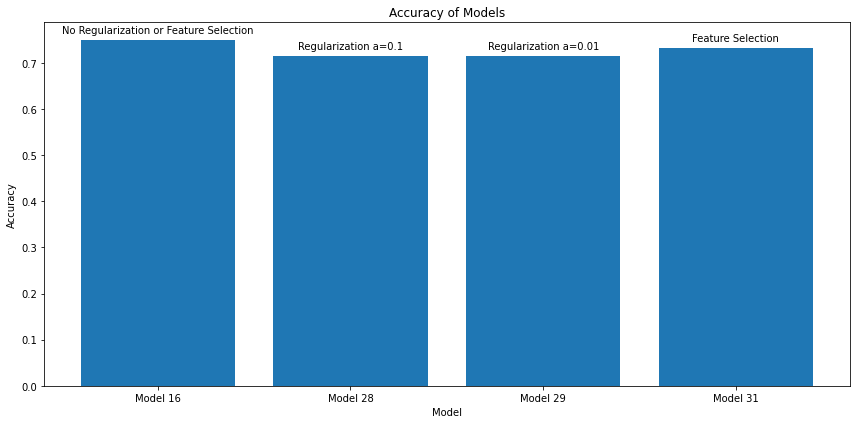

In [48]:
model_names = [best_name, 'Model 28', 'Model 29', 'Model 31']
labels = ['No Regularization or Feature Selection', 'Regularization a=0.1', 'Regularization a=0.01','Feature Selection']

accuracies = df_results.loc[model_names, 'Accuracy']
plt.figure(figsize=(12, 6))

bars = plt.bar(model_names, accuracies)

for bar, label in zip(bars, labels):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, label, ha='center', va='bottom')

plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()

# Show the plot
plt.show()


## 5 Conclusion -- Choose the best model

In [49]:
best_opt_name = best_params['optimizer']
best_learning_rate = best_params['learning_rate']
best_num_epochs = best_params['num_epochs']

X_trainfull_tensor = torch.tensor(X_train_full.toarray(), dtype=torch.float32)
y_trainfull_tensor = torch.tensor(y_train_full, dtype=torch.float32)

input_dim = X_trainfull_tensor.shape[1]
model = Perceptron(input_dim) 

full_dataset = TensorDataset(X_trainfull_tensor, y_trainfull_tensor)
full_dataloader = DataLoader(full_dataset , batch_size=32, shuffle=True)


In [50]:
best_optimizer = get_optimizer(best_opt_name, model, best_learning_rate)

best_model, best_loss = model_train(model, best_num_epochs, criterion, best_optimizer, full_dataloader)


In [51]:
test_accuracy, y_predict = test_model(best_model, X_test_tensor, y_test_tensor)
print(f"Final Test Accuracy : {test_accuracy * 100:.2f}%")

Final Test Accuracy : 77.59%


In [52]:
y_test_np = y_test_tensor.cpu().numpy()
y_predict_np = y_predict.cpu().numpy()  
conf_matrix = confusion_matrix(y_test_np, y_predict_np) 
class_report = classification_report(y_test_np, y_predict_np)

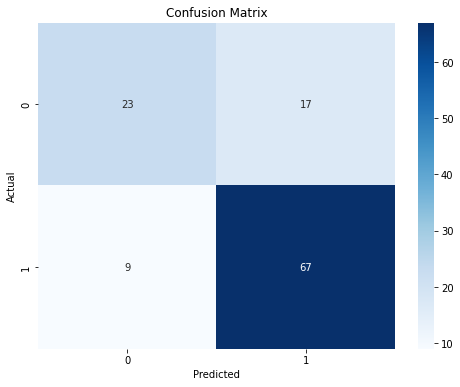

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.57      0.64        40
         1.0       0.80      0.88      0.84        76

    accuracy                           0.78       116
   macro avg       0.76      0.73      0.74       116
weighted avg       0.77      0.78      0.77       116

